# Workshop 6 

### Outline: 
 
1. Some background on training and backpropagation 
2. The effect of hyperparameters
3. Multi-Class Classifcation: Classifying newswires (Chapter 3)
4. Regression with Deep Learning (Chapter 3)

Source: Deep Learning with Keras, François Chollet, 2017

## Background

### Computational Graph In PyTorch

In [3]:
import torch

# Define input and weights
x = torch.tensor(2.0, requires_grad=True)
w = torch.tensor(3.0, requires_grad=True)

# Forward pass
y = x * w + 1

# Backward pass
y.backward()
print(x.grad)  # Output: 3.0

tensor(3.)


### Batch-Wise Training In PyTorch
Loss Aggregation

In [4]:
import torch
import torch.nn as nn

# Define predictions and targets
predictions = torch.tensor([[0.8, 0.1], [0.4, 0.5]], requires_grad=True)
targets = torch.tensor([0, 1])

# Define CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

# Compute batch loss
loss = criterion(predictions, targets)
print(loss)

tensor(0.5238, grad_fn=<NllLossBackward0>)


### Example Of Gradient Flow In PyTorch

In [5]:
import torch
import torch.nn as nn

# Define a simple model
model = nn.Linear(2, 1)  # Single layer: y = w * x + b
loss_fn = nn.MSELoss()

# Input and target
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]], requires_grad=True)
y = torch.tensor([[5.0], [7.0]])

# Forward pass
pred = model(x)
loss = loss_fn(pred, y)

# Backward pass
loss.backward()

# Gradients
print("Weight gradient:", model.weight.grad)
print("Bias gradient:", model.bias.grad)

Weight gradient: tensor([[-20.3875, -30.0992]])
Bias gradient: tensor([-9.7117])


### Practical Example — Backpropagation With Batches

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(3, 5)  # Input: 3 features, Output: 5 features
        self.fc2 = nn.Linear(5, 1)  # Output: 1 feature (regression task)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleModel()

In [7]:
# Create a batch of input data
batch_size = 4
x_batch = torch.rand(batch_size, 3)  # 4 samples, each with 3 features
y_batch = torch.rand(batch_size, 1)  # 4 target values

print("Input Batch:\n", x_batch)
print("Target Batch:\n", y_batch)

Input Batch:
 tensor([[0.8501, 0.2648, 0.3342],
        [0.2038, 0.3011, 0.3127],
        [0.0866, 0.5223, 0.8877],
        [0.9225, 0.1872, 0.4682]])
Target Batch:
 tensor([[0.6428],
        [0.7130],
        [0.0963],
        [0.8898]])


In [8]:
# Forward pass
y_pred = model(x_batch)
print("Predictions:\n", y_pred)

Predictions:
 tensor([[0.2687],
        [0.2885],
        [0.3081],
        [0.2716]], grad_fn=<AddmmBackward0>)


In [9]:
# Define the loss function
loss_fn = nn.MSELoss()

# Compute the loss
loss = loss_fn(y_pred, y_batch)
print("Batch Loss:", loss.item())

Batch Loss: 0.18676277995109558


In [10]:
# Backward pass
loss.backward()

# Inspect gradients
print("Gradients for fc1 weights:\n", model.fc1.weight.grad)
print("Gradients for fc2 weights:\n", model.fc2.weight.grad)

Gradients for fc1 weights:
 tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.0003,  0.0017,  0.0029],
        [-0.1944, -0.0472, -0.0730],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])
Gradients for fc2 weights:
 tensor([[ 0.0000,  0.0070, -0.1073,  0.0000,  0.0000]])


In [11]:
# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Update parameters
optimizer.step()

# Zero gradients after the update
optimizer.zero_grad()

In [12]:
# Inspect gradients after zeroing
print("Gradients after zeroing:\n", model.fc1.weight.grad)

Gradients after zeroing:
 None


## The effect of network structure and hyperparameters

/Users/raminahadi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 50/200, Loss: 0.5628
Epoch 100/200, Loss: 0.4332
Epoch 150/200, Loss: 0.3709
Epoch 200/200, Loss: 0.3230
Test Accuracy: 0.824999988079071


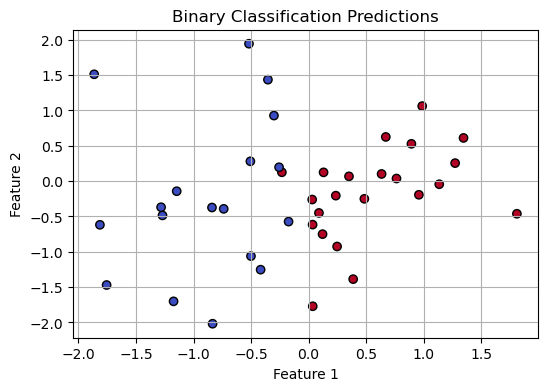

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic binary classification data
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=42
)

# Preprocess data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split and convert to tensors
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

# Define binary classifier model
class BinaryNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return torch.sigmoid(self.fc2(x))

# Initialize model, loss, optimizer
model = BinaryNet()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

#Train the model
for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/200, Loss: {loss.item():.4f}")
        
# Evaluate model on test set
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_labels = (predictions >= 0.5).float()
    accuracy = (predicted_labels == y_test_tensor).float().mean()

print("Test Accuracy:", accuracy.item())

# Visualize predictions
plt.figure(figsize=(6, 4))
plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted_labels.numpy().squeeze(), cmap='coolwarm', edgecolors='k')
plt.title("Binary Classification Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [15]:
# if we want batch training:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

for epoch in range(200):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/200, Loss: {loss.item():.4f}")

Epoch 50/200, Loss: 0.3913
Epoch 100/200, Loss: 0.2619
Epoch 150/200, Loss: 0.4388
Epoch 200/200, Loss: 0.3243


### A small grid search for hyperparameters

In [16]:
# Hyperparameter grid
learning_rates = [0.1, 0.01, 0.001]
hidden_sizes = [4, 8, 16, 32]
optimizers = ['sgd', 'adam']

# Track best model
best_acc = 0
best_config = None

for lr in learning_rates:
    for hidden_size in hidden_sizes:
        for opt_type in optimizers:

            # Define model class inside loop to reset weights
            class BinaryNet(nn.Module):
                def __init__(self):
                    super().__init__()
                    self.fc1 = nn.Linear(2, hidden_size)
                    self.fc2 = nn.Linear(hidden_size, 1)

                def forward(self, x):
                    x = torch.relu(self.fc1(x))
                    return torch.sigmoid(self.fc2(x))

            model = BinaryNet()
            criterion = nn.BCELoss()

            if opt_type == 'adam':
                optimizer = optim.Adam(model.parameters(), lr=lr)
            elif opt_type == 'sgd':
                optimizer = optim.SGD(model.parameters(), lr=lr)

            # Train model
            for epoch in range(100):
                model.train()
                optimizer.zero_grad()
                outputs = model(X_train_tensor)
                loss = criterion(outputs, y_train_tensor)
                loss.backward()
                optimizer.step()

            # Evaluate
            model.eval()
            with torch.no_grad():
                preds = model(X_test_tensor)
                pred_labels = (preds >= 0.5).float()
                acc = (pred_labels == y_test_tensor).float().mean().item()

            print(f"LR={lr}, Hidden={hidden_size}, Optimizer={opt_type} → Accuracy={acc:.4f}")

            if acc > best_acc:
                best_acc = acc
                best_config = (lr, hidden_size, opt_type)

print("\nBest configuration:")
print(f"Learning Rate = {best_config[0]}, Hidden Size = {best_config[1]}, Optimizer = {best_config[2]}")
print(f"Best Accuracy = {best_acc:.4f}")

LR=0.1, Hidden=4, Optimizer=sgd → Accuracy=0.8500
LR=0.1, Hidden=4, Optimizer=adam → Accuracy=0.9000
LR=0.1, Hidden=8, Optimizer=sgd → Accuracy=0.8500
LR=0.1, Hidden=8, Optimizer=adam → Accuracy=0.8250
LR=0.1, Hidden=16, Optimizer=sgd → Accuracy=0.8750
LR=0.1, Hidden=16, Optimizer=adam → Accuracy=0.9000
LR=0.1, Hidden=32, Optimizer=sgd → Accuracy=0.8750
LR=0.1, Hidden=32, Optimizer=adam → Accuracy=0.9250
LR=0.01, Hidden=4, Optimizer=sgd → Accuracy=0.4500
LR=0.01, Hidden=4, Optimizer=adam → Accuracy=0.9000
LR=0.01, Hidden=8, Optimizer=sgd → Accuracy=0.7750
LR=0.01, Hidden=8, Optimizer=adam → Accuracy=0.9000
LR=0.01, Hidden=16, Optimizer=sgd → Accuracy=0.7750
LR=0.01, Hidden=16, Optimizer=adam → Accuracy=0.9000
LR=0.01, Hidden=32, Optimizer=sgd → Accuracy=0.7500
LR=0.01, Hidden=32, Optimizer=adam → Accuracy=0.9250
LR=0.001, Hidden=4, Optimizer=sgd → Accuracy=0.4500
LR=0.001, Hidden=4, Optimizer=adam → Accuracy=0.7250
LR=0.001, Hidden=8, Optimizer=sgd → Accuracy=0.4250
LR=0.001, Hidden=8,

### Activation Function Effects

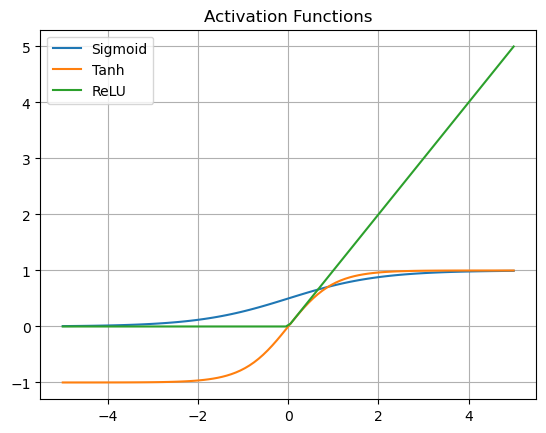

In [17]:
import torch.nn.functional as F

x = torch.linspace(-5, 5, 100)
plt.plot(x.numpy(), torch.sigmoid(x).numpy(), label='Sigmoid')
plt.plot(x.numpy(), torch.tanh(x).numpy(), label='Tanh')
plt.plot(x.numpy(), F.relu(x).numpy(), label='ReLU')
plt.title("Activation Functions")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Activation functions to compare (including linear)
activations = {
    "linear": lambda x: x,
    "sigmoid": torch.sigmoid,
    "tanh": torch.tanh,
    "relu": torch.relu
}

# Results tracker
results = {}

for name, activation_fn in activations.items():

    class BinaryNet(nn.Module):
        def __init__(self):
            super().__init__()
            self.fc1 = nn.Linear(2, 4)
            self.fc2 = nn.Linear(4, 1)

        def forward(self, x):
            x = activation_fn(self.fc1(x))
            return torch.sigmoid(self.fc2(x))  # Always use sigmoid for binary output

    model = BinaryNet()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    losses = []

    # Train
    for epoch in range(100):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    # Evaluate
    model.eval()
    with torch.no_grad():
        preds = model(X_test_tensor)
        pred_labels = (preds >= 0.5).float()
        acc = (pred_labels == y_test_tensor).float().mean().item()

    results[name] = {"losses": losses, "accuracy": acc}

    print(f"{name.upper()} → Final Test Accuracy: {acc:.4f}")

LINEAR → Final Test Accuracy: 0.8750
SIGMOID → Final Test Accuracy: 0.8500
TANH → Final Test Accuracy: 0.8500
RELU → Final Test Accuracy: 0.8500


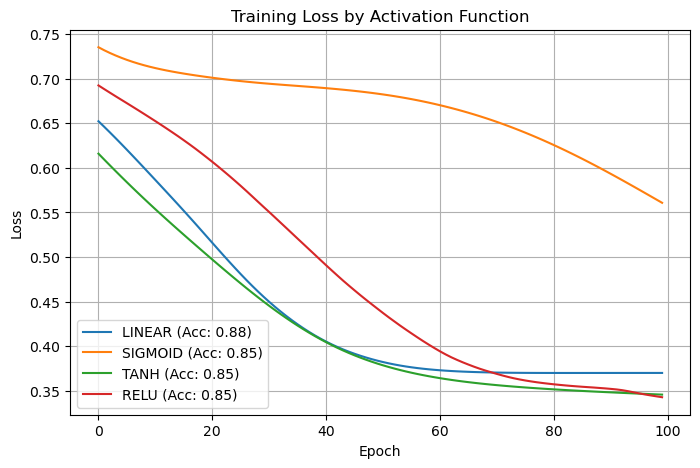

In [19]:
# Plot training losses for each activation function
plt.figure(figsize=(8, 5))
for name in results:
    plt.plot(results[name]["losses"], label=f'{name.upper()} (Acc: {results[name]["accuracy"]:.2f})')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss by Activation Function")
plt.legend()
plt.grid(True)
plt.show()

### Homework: Comparing Different Loss Functions

## Classifying Newswires

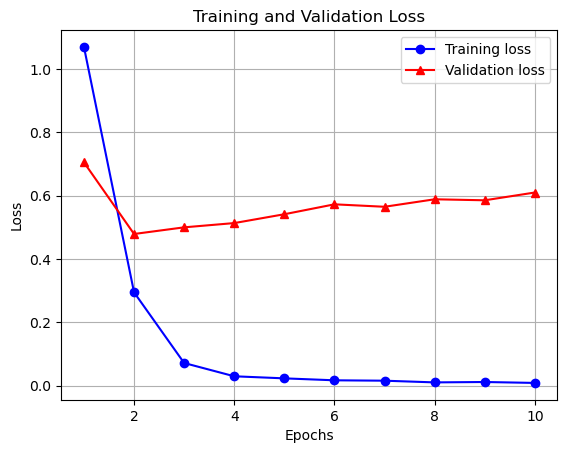

In [28]:
# PyTorch Tutorial: Text Classification with a Simple Neural Network (Using Real Dataset)

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load a real dataset (AG News from Hugging Face Datasets)
dataset = load_dataset("ag_news")

# Use a subset safely using .select()
subset = dataset['train'].select(range(2000))

texts = [row['text'] for row in subset]
labels = [row['label'] for row in subset]

# Vectorize the text using bag-of-words
vectorizer = CountVectorizer(binary=True, max_features=10000)
x = vectorizer.fit_transform(texts).toarray()

# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

# Convert to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Split into training and validation sets
val_size = 400
train_size = len(x_tensor) - val_size
train_ds, val_ds = random_split(TensorDataset(x_tensor, y_tensor), [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=64)

# Define the model
class TextClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = TextClassifier(input_dim=x.shape[1], num_classes=len(set(y)))
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.NLLLoss()

# Training loop
train_losses, val_losses = [], []
epochs = 10

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        output = model(xb)
        loss = criterion(output, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    train_losses.append(total_loss / len(train_loader))

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            output = model(xb)
            loss = criterion(output, yb)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

# Plotting
plt.plot(range(1, epochs + 1), train_losses, 'bo-', label='Training loss')
plt.plot(range(1, epochs + 1), val_losses, 'r^-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

## Task: Experiment with layers

We have a output layer with 46 nodes. What happens to the accuracy when we reduce the number of nodes the second intermediate layer
to 1?

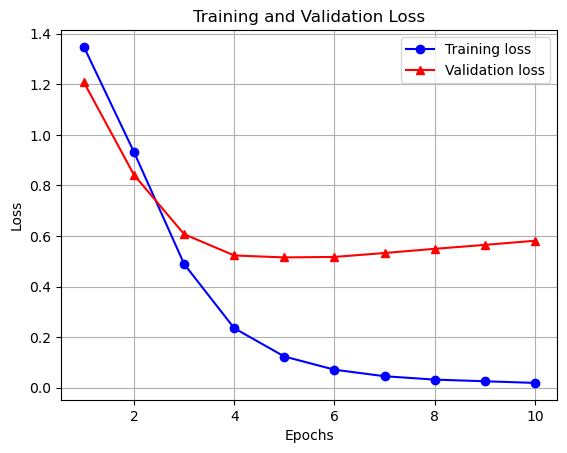

In [29]:
# PyTorch Tutorial: Text Classification with a Simple Neural Network (Using Real Dataset)
# Define the model
class TextClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 10)
        self.fc3 = nn.Linear(10, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

model = TextClassifier(input_dim=x.shape[1], num_classes=len(set(y)))
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.NLLLoss()

# Training loop
train_losses, val_losses = [], []
epochs = 10

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        output = model(xb)
        loss = criterion(output, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    train_losses.append(total_loss / len(train_loader))

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            output = model(xb)
            loss = criterion(output, yb)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

# Plotting
plt.plot(range(1, epochs + 1), train_losses, 'bo-', label='Training loss')
plt.plot(range(1, epochs + 1), val_losses, 'r^-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

## Task: Experiment with bag of words model
The most basic bag of words model we used assigned a 1 to any word that is in the article, but it doesn't take into account **frequencies**.

Can you think of a model that takes into account word frequencies?

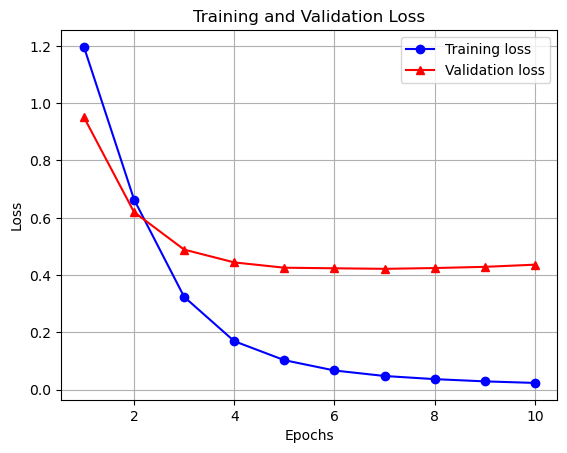

In [44]:

# Vectorize the text using bag-of-words
vectorizer = CountVectorizer(binary=False, max_features=10000)
x = vectorizer.fit_transform(texts).toarray()

# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

# Convert to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Split into training and validation sets
val_size = 400
train_size = len(x_tensor) - val_size
train_ds, val_ds = random_split(TensorDataset(x_tensor, y_tensor), [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)

# Define the model
class TextClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = TextClassifier(input_dim=x.shape[1], num_classes=len(set(y)))
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.NLLLoss()

# Training loop
train_losses, val_losses = [], []
epochs = 10

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        output = model(xb)
        loss = criterion(output, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    train_losses.append(total_loss / len(train_loader))

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            output = model(xb)
            loss = criterion(output, yb)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

# Plotting
plt.plot(range(1, epochs + 1), train_losses, 'bo-', label='Training loss')
plt.plot(range(1, epochs + 1), val_losses, 'r^-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

### Take-Home Message:

1. N Classes => N Output Nodes
2. Output Layer should be a SoftMAX Activation function (provided that you want to a assign each data point to ONE class)
3. Categorical Crossentropy is in many cases the loss function you should use for classification
4. Avoid Information Bottlenecks (i.e., don't use hidden layers with too few nodes)
5. Pre-processing inputs in a clever way can be more important than network tuning!

## 4 Regression with Deep Learning

In [45]:
# PyTorch version of California Housing regression with k-fold cross-validation

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, Subset
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load California Housing data (replacement for deprecated Boston housing)
housing = fetch_california_housing()
data = housing.data
targets = housing.target

# Standardize features
scaler = StandardScaler()
data = scaler.fit_transform(data)
targets = targets.astype(np.float32)

# Convert to PyTorch tensors
x_tensor = torch.tensor(data, dtype=torch.float32)
y_tensor = torch.tensor(targets, dtype=torch.float32).unsqueeze(1)

dataset = TensorDataset(x_tensor, y_tensor)

# Define model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.out = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)

# K-fold cross-validation
k = 4
num_epochs = 10
batch_size = 16
all_scores = []
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    print(f"Processing fold #{fold}")
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size)

    model = RegressionModel(input_dim=data.shape[1])
    optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        for xb, yb in train_loader:
            optimizer.zero_grad()
            loss = criterion(model(xb), yb)
            loss.backward()
            optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        val_losses = [F.l1_loss(model(xb), yb, reduction='mean').item() for xb, yb in val_loader]
    all_scores.append(np.mean(val_losses))

print("MAE for each fold:", all_scores)
print("Average MAE:", np.mean(all_scores))

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3
MAE for each fold: [0.3817298785544032, 0.3681772940852694, 0.36447479541272204, 0.3773930241864163]
Average MAE: 0.37294374805970276


Processing fold #0
Processing fold #1


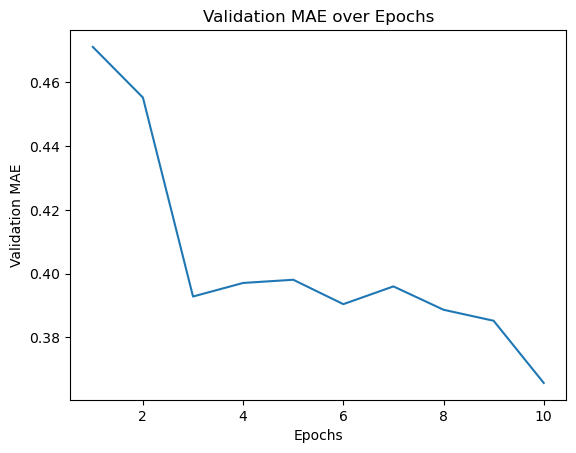

Final MAE on full dataset: 0.2962745726108551


In [48]:
# Advanced: track MAE history per epoch
k = 2
num_epochs = 10
all_mae_histories = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    print(f"Processing fold #{fold}")
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    train_loader = DataLoader(train_subset, batch_size=1, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=1)

    model = RegressionModel(input_dim=data.shape[1])
    optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    mae_history = []
    for epoch in range(num_epochs):
        model.train()
        for xb, yb in train_loader:
            optimizer.zero_grad()
            loss = criterion(model(xb), yb)
            loss.backward()
            optimizer.step()

        # MAE on validation set
        model.eval()
        with torch.no_grad():
            mae = [F.l1_loss(model(xb), yb, reduction='mean').item() for xb, yb in val_loader]
        mae_history.append(np.mean(mae))

    all_mae_histories.append(mae_history)

# Average MAE per epoch
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

# Plot
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.title("Validation MAE over Epochs")
plt.show()

# Final evaluation on full dataset (simulate Keras approach)
train_loader = DataLoader(dataset, batch_size=16, shuffle=True)

model = RegressionModel(input_dim=data.shape[1])
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

for epoch in range(80):
    model.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        loss = criterion(model(xb), yb)
        loss.backward()
        optimizer.step()

model.eval()
with torch.no_grad():
    preds = model(x_tensor)
    final_mae = F.l1_loss(preds, y_tensor).item()

print("Final MAE on full dataset:", final_mae)

PyTorch Final MAE: 0.29588472843170166
XGBoost Final MAE: 0.3467597


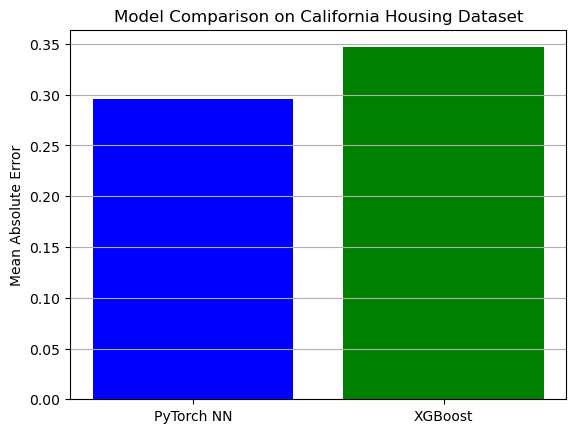

In [50]:
# PyTorch and XGBoost comparison for California Housing regression

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, Subset
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Load California Housing data
housing = fetch_california_housing()
data = housing.data
targets = housing.target

# Standardize features
scaler = StandardScaler()
data = scaler.fit_transform(data)
targets = targets.astype(np.float32)

# Convert to PyTorch tensors
x_tensor = torch.tensor(data, dtype=torch.float32)
y_tensor = torch.tensor(targets, dtype=torch.float32).unsqueeze(1)

dataset = TensorDataset(x_tensor, y_tensor)

# Define PyTorch model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.out = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)

# Train final PyTorch model
train_loader = DataLoader(dataset, batch_size=16, shuffle=True)
model = RegressionModel(input_dim=data.shape[1])
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

for epoch in range(80):
    model.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        loss = criterion(model(xb), yb)
        loss.backward()
        optimizer.step()

model.eval()
with torch.no_grad():
    preds = model(x_tensor)
    pytorch_mae = F.l1_loss(preds, y_tensor).item()

print("PyTorch Final MAE:", pytorch_mae)

# XGBoost regression
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, y_pred)

print("XGBoost Final MAE:", xgb_mae)

# Comparison Plot
methods = ['PyTorch NN', 'XGBoost']
mae_scores = [pytorch_mae, xgb_mae]

plt.bar(methods, mae_scores, color=['blue', 'green'])
plt.ylabel("Mean Absolute Error")
plt.title("Model Comparison on California Housing Dataset")
plt.grid(True, axis='y')
plt.show()


#### Take-Home Message
1. Mean squared error (MSE) is a loss function commonly used for regression.
2. A common regression metric is mean absolute error.
3. When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
4. When there is little data available, using K-fold validation is a great way to reliably evaluate a model.
5. If there is little data, use small network. Otherwise your network might overfit.